<a href="https://colab.research.google.com/github/nurfnick/Operations_Research/blob/main/Chapters/Chapter08GreedyHeuristics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Greedy Heuristics





## Theory

## Introduction/Motivation









**INTRODUCTION**

Heuristics are algorithms that are used to find good, approximate solutions to challenging combinatorial problems that would otherwise be impossible to solve with existing optimization strategies. A heuristic is a direct search method that use favorable rules of thumb to find a better solution. Heuristics have the advantage of being able to find(good) answers quickly.The main idea of Heuristics is rather than finding a optimal solution, it takes or finds a solution that is almost optimal or close to optimal.




**Why is it greedy?**


A greedy heuristics is an algorithmic strategy that makes the best optimal choice at each small stage with the goal of this eventually leading to a globally optimum solution. This means that the algorithm picks the best solution at the moment without regard for consequences. It picks the best immediate output, but does not guarantee the global optimum solution, hence it is considered greedy.




**MOTIVATION**

The greedy heuristics works by making locally optimal decision on every step hoping to get an global optimal solution. Since this algorithm doesn't try to optimize the problem globally, it can be very fast, faster than  many other algorithms. So, in a probelm like the travelling salemans a person has to travel a lot of cities and the algorithm can get preety complex and time consuming if we try to optimize it using other algorithm. But using greedy meathod we might be able to get the optimal solution but the time complexity would be a lot lower. We can also apply thsi in our real life, for example if we cannot find our keys at home, and if we try  to look for the keys in every corner of our house it can be time consuming and also most of us don't search the places like the freezer or the places we dont keep them. Rather we use greedy meathod to look for the places we keep our key most of the time. We may not find the key everytime by the greedy meathod but if we do it will be a lot faster then searching all over our house.




**HISTORY**


The greedy search rule, which requires increasing the value of the objective function with each search move, is used in the early stages of heuristic development. The search comes to a halt at a local optimum, beyond which no further advancement is feasible. The Dutch computer scientist and mathematician Edsger W. Dijkstra coined the term greedy algorithm for the first time when he wanted to calculate the minimum spanning tree. Back then, the greedy algorithms were primarily used to solve graph based problems. In the 1950s, the greedy algorithm first started to show around. During the same decade, the then scientist Prim and Kruksal also found the optimization techniques for reducing the costs of the graphs. In the 1970s, a few years later, many American researchers presented a recursive strategy for solving greedy problems. The NIST records filed the greedy algorithm as a different optimization strategy. Since that time, the greedy heuristics have been broadly used in numerous fields including the web protocols like open-shortest-path-first(OSPF) and several other network packet switching protocols.




****



### Example 1

**TRAVELLING SALESMAN PROBLEM**

The traveling salesman problem consists of a salesman and a set of cities. The salesman has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city. The challenge of the problem is that the traveling salesman wants to minimize the total length of the trip.



Greedy algorithm is the simplest improvement algorithm. It starts with
the departure Node 1. Then the algorithm calculates all the distances to
other n − 1 nodes. Go to the next closest node. Take the current node as
the departing node, and select the next nearest node from the remaining
n − 2 nodes. The process continues until all the nodes are visited once
and only once then back to Node 1. When the algorithm is terminated,
the sequence is returned as the best tour.



**Problem Statement**

Given a set of cities and distance between every pair of cities as an adjacency matrix, the problem is to find the shortest possible route that visits every city exactly once and returns to the starting point.


**INPUT**

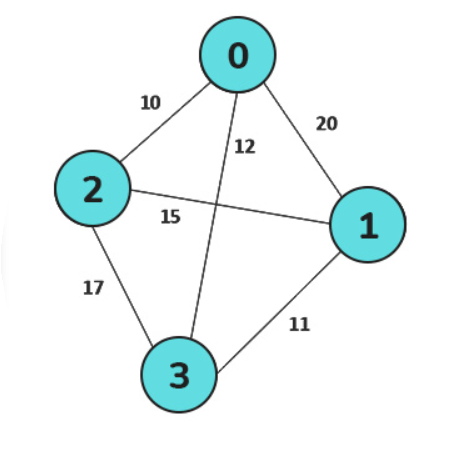

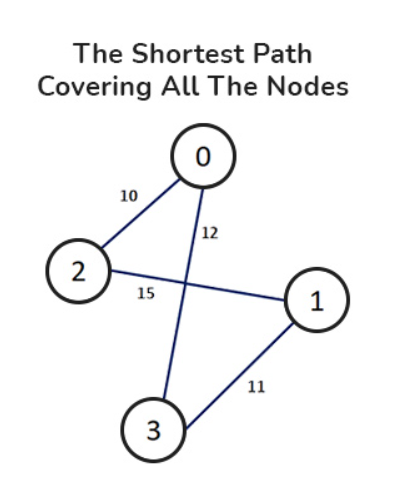

**Hill Climbing Algorithm**

 We are trying to find the shortest path for the salemans to visit all the cities only once and return back to the original city using a greedy heuristics that follows greedy algorithms.For our problem on Travelling salesman we are using the algorithm Hill climbling. Hill climbling is a algorithm which follows greedy meathod by optimizing at local instance.
 
Hill climbing is a mathematical optimization procedure whose goal is to discover the best solution to a problem with a (big) number of alternatives. The best way to explain the method (and optimization in general) is to use an example. We have a salesman in the Traveling salesman problem who needs to visit a number of cities exactly once before returning to the first. We have the distances between each pair of cities and need to identify the shortest path between them. As you might expect, a specific Traveling salesman problem has a huge number of different solutions (routes); the goal is to discover the best (i.e. shortest) solution. Which means the problem itself is not greeedy but the solution we are using is greedy. The solution is greedy because instead of trying to optimize the whole problem we are trying to optimize the various steps on the solution.

**Implementation of the problem**

**Step 1**

Hill climbing must begin with a random solution to our Traveling salesman problem in order to work. It can then produce neighboring solutions and begin the optimization process from there. What kind of solution should we come up with? A list of IDs for all cities, in the order the salesperson should visit them, could be a simple solution to the Traveling salesman dilemma. Every city must be visited only once. Let's start by making a list of all city identifiers (named cities in the code below), and then pick a city at random from that list and add it to our solution repeatedly.

In [ ]:
import random

def randomSolution(tsp):
    cities = list(range(len(tsp)))
    solution = []

    for i in range(len(tsp)):
        randomCity = cities[random.randint(0, len(cities) - 1)]
        solution.append(randomCity)
        cities.remove(randomCity)

    return solution


**Step 2**

We need a method to calculate the length of a certain solution since we want our Hill Climber to locate the shortest option. This function requires the Traveling salesman problem (for information on distances between cities) and, of course, the solution to which the route length is required. We may iterate over a solution and use the tsp argument to add the distance to each new city to our overall route length because a solution is a list of all cities in a certain order. When I equals 0, the iterator I "visits" each city, so i-1 is "at" the previous or last city (which is exactly what we want, since we want to end up at the first city again). As a result, solution[i] represents the current city, while solution[i-1] represents the prior one. Then we simply use the tsp to calculate the distance between the two points.

In [ ]:
def routeLength(tsp, solution):
    routeLength = 0
    for i in range(len(solution)):
        routeLength += tsp[solution[i - 1]][solution[i]]
    return routeLength

**Step 3**

Hill climbing works in part by creating all neighboring solutions to the current solution, as previously stated. Let's make a function that does just that. The term "neighboring solution" refers to a solution that is only marginally different from the existing one. It's also worth noting that a neighbor must still be a correct solution: every city must be visited exactly once. We can do both by making a neighbor in the following way: Copy the current solution and switch the locations of two cities! This manner, we can come up with a somewhat different but still correct sol

In [ ]:
def getNeighbours(solution):
    neighbours = []
    for i in range(len(solution)):
        for j in range(i + 1, len(solution)):
            neighbour = solution.copy()
            neighbour[i] = solution[j]
            neighbour[j] = solution[i]
            neighbours.append(neighbour)
    return neighbours

**Step 4**

Now that we have a function generating all neighbours to a solution, it’s time we create one finding the best of these neighbours. This is a pretty straightforward function: it first sets the bestNeighbour to the first neighbour in the list of neighbours (and bestRouteLength to its route length), and then iterates over all neighbours; when a neighbour has a shorter route length, both bestNeighbour and bestRouteLength are updated. This way, the best neighbour is found:

In [ ]:
def getBestNeighbour(tsp, neighbours):
    bestRouteLength = routeLength(tsp, neighbours[0])
    bestNeighbour = neighbours[0]
    for neighbour in neighbours:
        currentRouteLength = routeLength(tsp, neighbour)
        if currentRouteLength < bestRouteLength:
            bestRouteLength = currentRouteLength
            bestNeighbour = neighbour
    return bestNeighbour, bestRouteLength

**Step 5**

It’s time for the core function! After creating the previous functions, this step has become quite easy:
First, we make a random solution and calculate its route length. We then create the neighbouring solutions, and find the best one. From there on, as long as the best neighbour is better than the current solution, we repeat the same pattern with the current solution each time being updated with the best neighbour. When this process stops, we return the current solution (and its route length).

In [ ]:
def hillClimbing(tsp):
    currentSolution = randomSolution(tsp)
    currentRouteLength = routeLength(tsp, currentSolution)
    neighbours = getNeighbours(currentSolution)
    bestNeighbour, bestNeighbourRouteLength = getBestNeighbour(tsp, neighbours)

    while bestNeighbourRouteLength < currentRouteLength:
        currentSolution = bestNeighbour
        currentRouteLength = bestNeighbourRouteLength
        neighbours = getNeighbours(currentSolution)
        bestNeighbour, bestNeighbourRouteLength = getBestNeighbour(tsp, neighbours)

    return currentSolution, currentRouteLength

In [ ]:
def main():
    tsp = [
        [0, 400, 500, 300],
        [400, 0, 300, 500],
        [500, 300, 0, 400],
        [300, 500, 400, 0]
    ]

    print(hillClimbing(tsp))

if __name__ == "__main__":
    main()

([0, 3, 2, 1], 1400)


After running the code multiple times (results can differ because the initial solution is random), We consistently see a best route length of 1400. That’s great! Our algorithm finds the best route although we are using greedy method,  we might be getting optimized result because the problem is very simple consisting of only 4 cities. I we increase the numbe rof cities the solution might not be optimal but close to optimal.

### Problems

1) Since on the above example we are using a matrix of 4 * 4 to plot our graph for the cities. Can you use the same  greedy algorithm to generate a graph using a 6 * 6 matrix and find the shortest path the salesman takes?

2)Can you use the same  greedy algorithm to generate a graph using a 7 *7 matrix and find the shortest path the salesman takes?

3)Can you use the same  greedy algorithm to generate a graph using a 8 * 8 matrix and find the shortest path the salesman takes?

4)Can you use the same  greedy algorithm to generate a graph using a 10 * 10 matrix and find the shortest path the salesman takes?

5)After solving for the larger matrix for this problem, derive a algorithm  to generate a 4 * 4 matrix and find the shortest path that the saleman takes to visities all the nodes in the graph using greedy method?

6)Derive a algorithm  to generate a 7 * 7 matrix and find the shortest path that the saleman takes to visities all the nodes in the graph using greedy method?

7)Derive a algorithm  to generate a 8 * 8 matrix and find the shortest path that the saleman takes to visities all the nodes in the graph using greedy method?

8)Can you Derive a algorithm  to generate a 4 * 4 matrix and graph the matrix forming a map and find the shortest path that the saleman takes to visities all the nodes in the graph using greedy method?

9) After you complete  problem 8 try to plot a graph of the output showing different direction used by the salesman?

10) can you take a really large matrix and use all the techniques you used to solve the previous 9 problems?




## References

- Maciej Białogłowski, et al. “Dynamics of Stochastic vs. Greedy Heuristics in Traveling Salesman Problem.” Zeszyty Naukowe Warszawskiej Wyższej Szkoły Informatyki, vol. 12, no. 19, Dec. 2018, pp. 7–24. EBSCOhost, doi:10.26348/znwwsi.19.7.

- Bee. “Greedy Algorithms in Python.” Skerritt.blog (Alt + H), 1 Jan. 2021, skerritt.blog/greedy-algorithms/. 

- Corman H. Thomas, Leiserson E. Charles, Rivest L. Ronald, Stein Clifford “Introduction to
Algorithms” Second Edition McGrawHill Book Company 

- David L.Applegate, Robert E.Bixby, Vasek Chvatal, William J.Cook ”The
Traveling Salesman Problem”, year = 2001.

- http://math.mit.edu/~goemans/18453S17/TSP-CookCPS.pdf

- https://towardsdatascience.com/how-to-implement-the-hill-climbing-algorithm-in-python-1c65c29469de






## Project Idea

Since the greedy heuristics is not applicable to find the solution for every problem, but it can help to reach some level of solution for time consuming problems. So for the project idea Just like the travelling sales man problem can we find other real life example that can be solved using a greedy heuristics. For example one of the project would be finding a shortest hiking routes for a complex hiking trail of a national park, which consist of more than thousand routes. So finding a shortest routes to hit all the spot of the national park and return where you started maximizing the time and the spot visited. 

### Authors

Principal authors of this chapter were:Sagar Sitaula, Anjila Karki, Indra Thapa

